<a href="https://colab.research.google.com/github/mirpouya/Image-Classification/blob/main/Predicting_rock_or_mine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing required libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

First step in every machine learning project is data gethering and then
data preprocessing

In [4]:
# loading data
sonar_data = pd.read_csv("/content/sonar data.csv")
sonar_data.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [5]:
# checking the dimensions of data
sonar_data.shape

(207, 61)

In [6]:
# as you see, headers (column names) are not informative, so we drop them
sonar_data = pd.read_csv("/content/sonar data.csv", header=None)
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [7]:
sonar_data.shape

(208, 61)

In [8]:
# take a look at statistical measures of data
# an insightful report
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [9]:
# hence the number of featues (columns) are a lot, describe funtion might return perplexing report

In [10]:
# plotting classes distribution using barplot

mines_count, rocks_count = sonar_data[60].value_counts() 
mines_count, rocks_count

(111, 97)

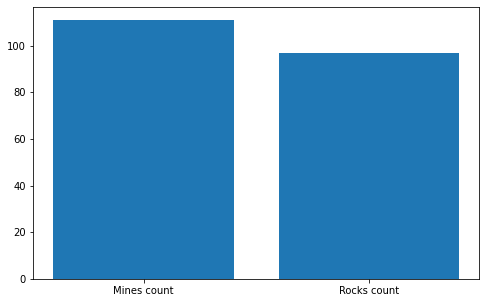

In [11]:
from matplotlib import pyplot as plt

# Figure Size
fig = plt.figure(figsize =(8, 5))

 
# Horizontal Bar Plot
plt.bar(["Mines count", "Rocks count"], [mines_count, rocks_count])
 
# Show Plot
plt.show()

In [12]:
# grouping data into two groups -> mines and rocks
# averaging all the mines and rocks rows

sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


It's time to separate data into features and labels (targets)
and store them into X and y

In [13]:
# axis=1 : drop a column, axis=0 : drop a row
X = sonar_data.drop(columns=60, axis=1)
y = sonar_data[60]

Split the data into train and test sections

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=5)
print("X_train shape : {}".format(X_train.shape))
print("y_train shape : {}".format(y_train.shape))
print("X_test shape : {}".format(X_test.shape))
print("y_test shape : {}".format(y_test.shape))

X_train shape : (187, 60)
y_train shape : (187,)
X_test shape : (21, 60)
y_test shape : (21,)


In [15]:
y_train.value_counts()

M    100
R     87
Name: 60, dtype: int64

In [16]:
y_test.value_counts()

M    11
R    10
Name: 60, dtype: int64

Now we are goint to train our model

In [17]:
# we use LogisticRegression as we are doing binary classification
model = LogisticRegression()

# fitting the model to our training data
model.fit(X_train, y_train)

LogisticRegression()

Evaluating the model

In [18]:
train_prediction = model.predict(X_train)
train_prediction

array(['M', 'M', 'M', 'R', 'R', 'M', 'R', 'R', 'M', 'M', 'R', 'M', 'M',
       'R', 'R', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'R', 'M',
       'R', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'M', 'R', 'M', 'M',
       'R', 'M', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'M',
       'R', 'M', 'R', 'M', 'M', 'M', 'R', 'R', 'M', 'R', 'R', 'R', 'M',
       'R', 'R', 'R', 'M', 'R', 'M', 'R', 'R', 'R', 'M', 'R', 'R', 'M',
       'M', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'M',
       'R', 'M', 'M', 'R', 'R', 'M', 'R', 'R', 'M', 'M', 'R', 'R', 'R',
       'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'M',
       'M', 'M', 'R', 'R', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'R',
       'R', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'M', 'R', 'M',
       'M', 'M', 'R', 'M', 'M', 'M', 'R', 'R', 'M', 'R', 'R', 'M', 'R',
       'M', 'M', 'R', 'M', 'M', 'R', 'R', 'R', 'M', 'R', 'M', 'M', 'M',
       'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'R

In [22]:
# checking train accuracy
train_score = model.score(X_train, y_train)
print("train set accuracy : {}".format(train_score))

train set accuracy : 0.8342245989304813


The model is doing pretty well on training set, but its critical to see how well it performs on the unseen data (test set)

In [20]:
# checking test accuracy
test_prediction = model.predict(X_test)
test_prediction

array(['R', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M',
       'R', 'R', 'M', 'M', 'M', 'R', 'M', 'R'], dtype=object)

In [21]:
# evaluating model's performance on test set
test_score = model.score(X_test, y_test)
print("test set accuracy : {}".format(test_score))

test set accuracy : 0.6190476190476191


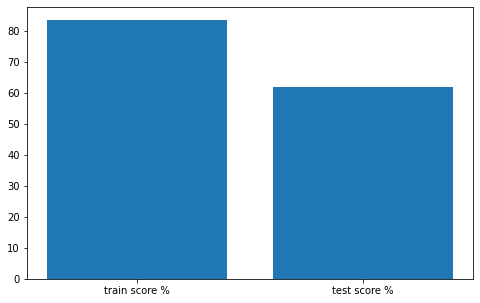

In [23]:
# plotting test-set ana train-set accuracy in a barplot

# Figure Size
fig = plt.figure(figsize =(8, 5))

 
# Horizontal Bar Plot
plt.bar(["train score %", "test score %"], [train_score*100, test_score*100])
 
# Show Plot
plt.show()